<a href="https://colab.research.google.com/github/ahrarbinaslam/Car-Price-Prediction-using-Multiple-Linear-Regression-with-L1-Regularization/blob/main/Car_Price_Prediction_using_Multiple_Linear_Regression%20with%20L1%20Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Car Price Prediction using Multiple Linear Regression with L1 Regularization**

Importing Required Libraries

In [444]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import metrics

Loading and Exploring the Dataset

In [445]:
df=pd.read_csv("CarPrice_Assignment.csv")
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Checking the Shape of the dataset

In [446]:
print("The shape of our dataset is", df.shape)

The shape of our dataset is (205, 26)


In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [448]:
df.nunique()

,0
car_ID,205
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
wheelbase,53


Checking if there are any null values.

In [449]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


Descriptive Statistics of the Dataset

In [450]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Data Visualization

[Text(0.5, 0, 'Fuel Type'), Text(0, 0.5, 'Frequency of Fuel Type')]

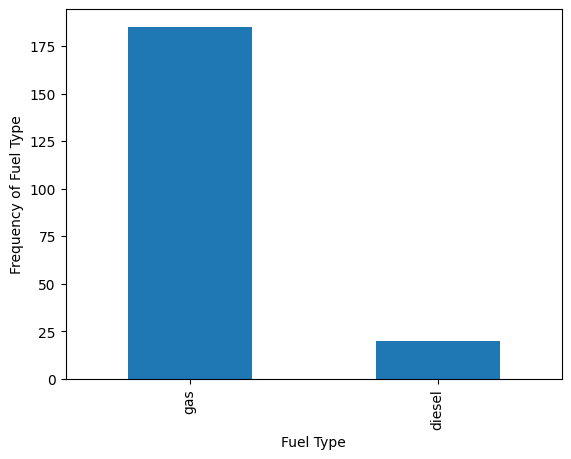

In [451]:
fuel=df["fueltype"].value_counts().plot(kind="bar")
fuel.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel Type')

Based on the data dictionary: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

[Text(0.5, 24.0, 'Insurance Rating'),
 Text(24.000000000000007, 0.5, 'Insurance Rating')]

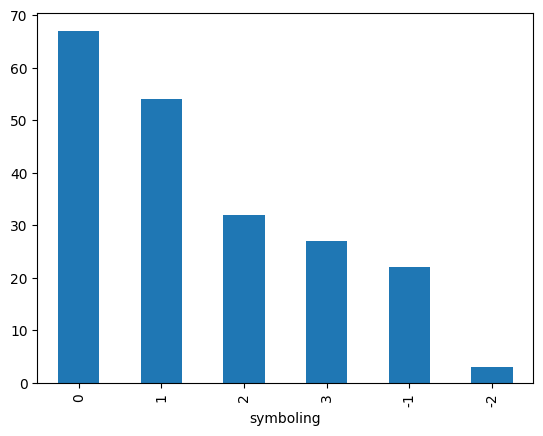

In [452]:
insurance_rating=df["symboling"].value_counts().plot(kind="bar")
fuel.set(xlabel = 'Insurance Rating', ylabel='Insurance Rating')

array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>],
       [<Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

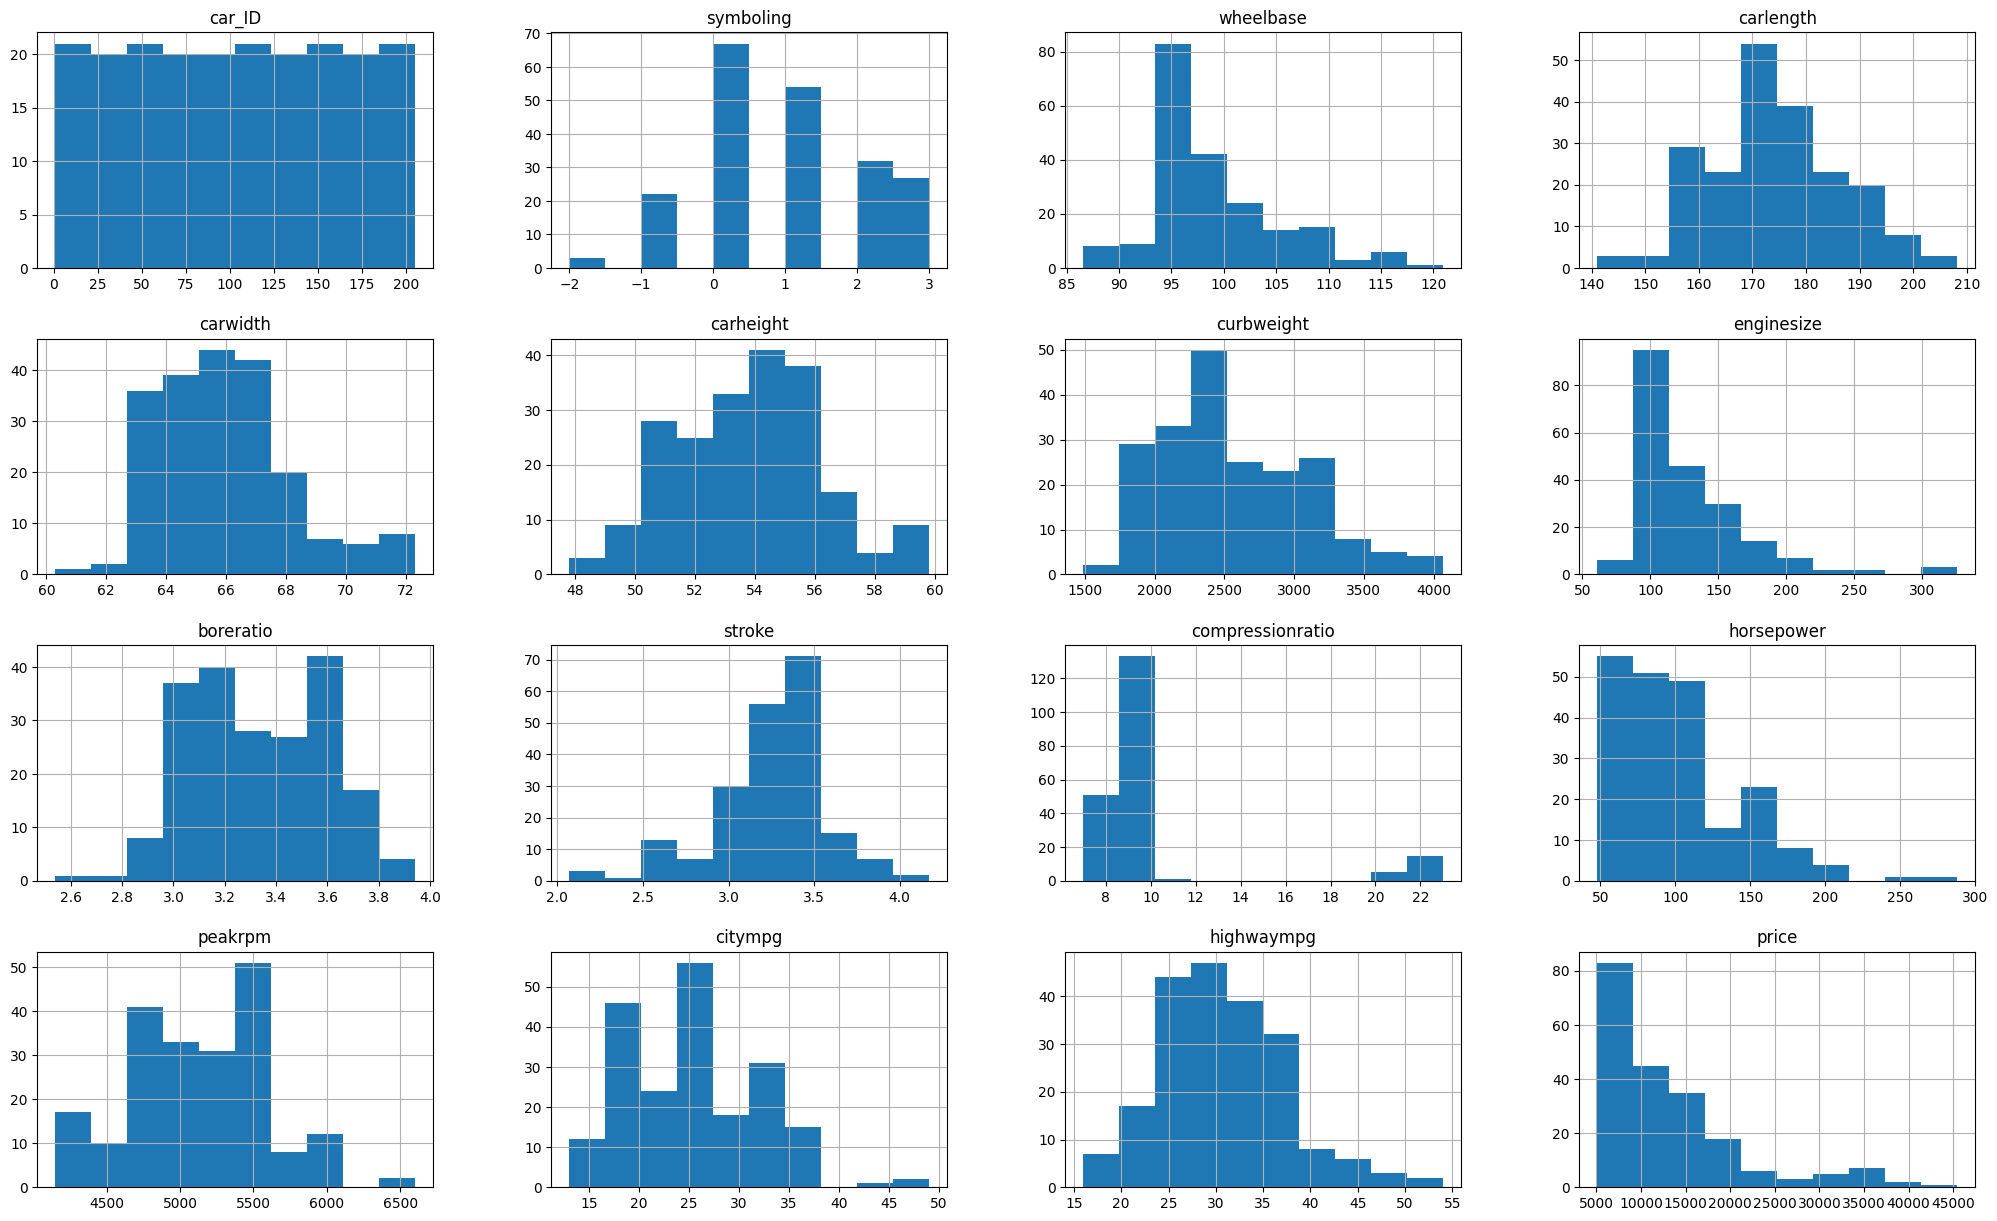

In [453]:
df.hist(figsize=(25,15))

Feature Engineering

In [454]:
features=df.drop("car_ID", axis=1)
numeric_features=features.select_dtypes(include=np.number)

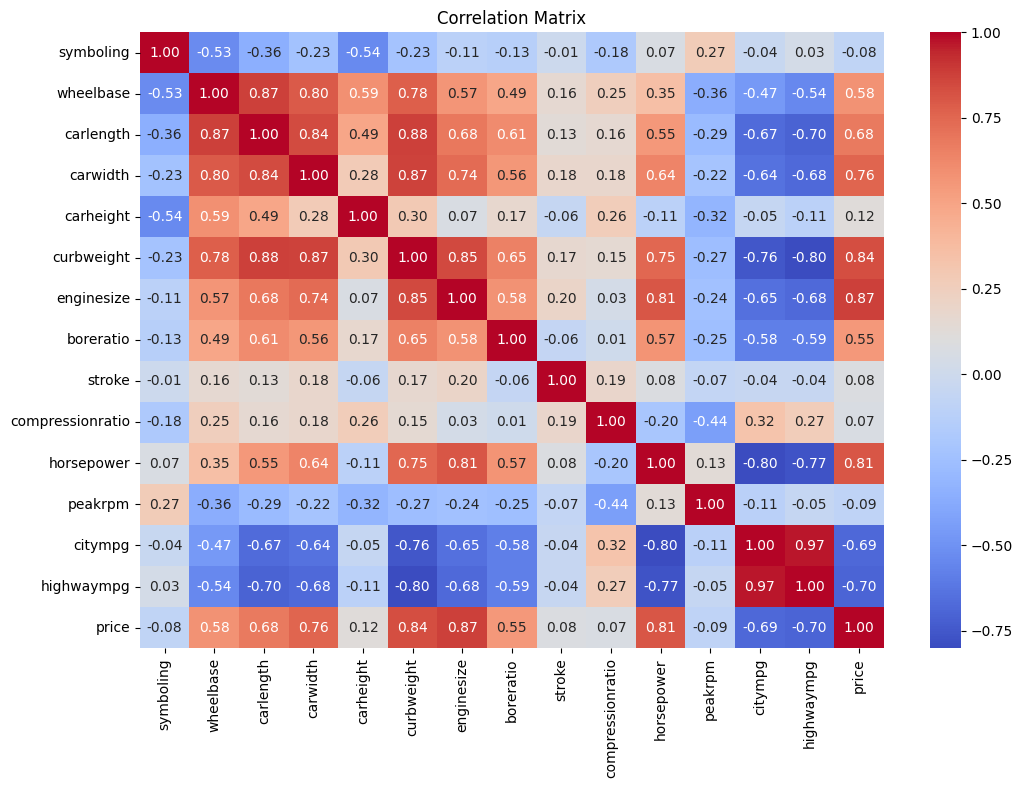

In [455]:
correlation_matrix = numeric_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [456]:
features=features.drop(["stroke", "compressionratio", "symboling", "peakrpm"], axis=1)
features

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,2952,ohc,four,141,mpfi,3.78,114,23,28,16845.0
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3049,ohc,four,141,mpfi,3.78,160,19,25,19045.0
202,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485.0
203,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3217,ohc,six,145,idi,3.01,106,26,27,22470.0


In [457]:
features_to_transform=["CarName", "fueltype","aspiration", "doornumber", "carbody", "drivewheel","enginelocation", "enginetype","cylindernumber","fuelsystem"]
features = pd.get_dummies(features, columns=features_to_transform, drop_first=True)

In [458]:
features.shape

(205, 186)

In [459]:
price=features["price"]
price

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [460]:
features=features.drop("price", axis=1)
features

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,...,False,False,False,False,False,False,False,True,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,...,False,False,False,False,False,False,False,True,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,154,19,26,...,False,False,False,False,False,False,False,True,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,102,24,30,...,False,False,False,False,False,False,False,True,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,115,18,22,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,114,23,28,...,False,False,False,False,False,False,False,True,False,False
201,109.1,188.8,68.8,55.5,3049,141,3.78,160,19,25,...,False,False,False,False,False,False,False,True,False,False
202,109.1,188.8,68.9,55.5,3012,173,3.58,134,18,23,...,False,False,False,False,False,False,False,True,False,False
203,109.1,188.8,68.9,55.5,3217,145,3.01,106,26,27,...,False,False,False,False,False,True,False,False,False,False


Splitting the data into training and testing using `train_test_split`.

In [461]:
X_train, X_test, y_train, y_test=train_test_split(features, price, test_size=0.2,random_state=42)
len(X_train), len(y_train)
len(X_test), len(y_test)

(41, 41)

Using Linear Regression model.

In [462]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [463]:
y_predicted=model.predict(X_test)

In [464]:
model.score(X_train,y_train)

0.9960453288706866

Evaluating the model

In [465]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_predicted) / y_test)) * 100
r2 = r2_score(y_test, y_predicted)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error", mape)
print("R (squared)", r2)

Mean Absolute Error: 4243.7018859983355
Mean Squared Error: 36875464.16248146
Root Mean Squared Error: 6072.517119159193
Mean Absolute Percentage Error 37.79112958477427
R (squared) 0.5328909808293849


Since the R (square) value is low, we can use Lasso (L1) or Ridge (L2) regularization.

In [466]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1, random_state=42)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, random_state=42, tol=0.1)

In [467]:
lasso_reg.score(X_train, y_train)

0.8929196961945718

In [468]:
lasso_reg.score(X_test, y_test)

0.7960069610254971

In [469]:
y_predicted=lasso_reg.predict(X_test)

In [470]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_lasso = mean_absolute_error(y_test, y_predicted)
mse_lasso = mean_squared_error(y_test, y_predicted)
rmse_lasso = np.sqrt(mse)
mape_lasso = np.mean(np.abs((y_test - y_predicted) / y_test)) * 100
r2_lasso = r2_score(y_test, y_predicted)
print("Mean Absolute Error:", mae_lasso)
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("Mean Absolute Percentage Error", mape_lasso)
print("R (squared)", r2_lasso)

Mean Absolute Error: 2874.665128261833
Mean Squared Error: 16104030.72810798
Root Mean Squared Error: 6072.517119159193
Mean Absolute Percentage Error 27.34049674540731
R (squared) 0.7960069610254971
